# Portfolio Optimization with Sharpe Ratio


**Objective:** This notebook demonstrates how to construct and optimize an investment portfolio using the Sharpe Ratio. We use historical adjusted close prices for AAPL, MSFT, GOOGL, AMZN and TSLA (2019-01-01 to 2024-12-31), simulate portfolio combinations, and optimize for maximum Sharpe Ratio. Results include the efficient frontier, the optimal weights, and interpretation for practical use.


***

In [119]:
# Import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import random
from scipy.optimize import minimize
%matplotlib inline

In [120]:
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]
prices = yf.download(tickers, start = "2019-01-01", end="2024-12-31", auto_adjust=False) ['Adj Close']
prices.head() # For testing the 5 first rows


[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2019-01-02,37.575207,76.956497,52.372784,94.789665,20.674667
2019-01-03,33.832436,75.014000,50.922287,91.302559,20.024000
2019-01-04,35.276726,78.769501,53.534264,95.548981,21.179333
2019-01-07,35.198204,81.475502,53.427509,95.670837,22.330667
2019-01-08,35.869190,82.829002,53.896770,96.364517,22.356667


In [121]:
stock_datasets = {}

for ticker in tickers:
    # Create individual DataFrame for each stock
    df = pd.DataFrame({
        'Date': prices.index,
        'Adj Close': prices[ticker],
    }).dropna()
    
    # Reset the index to take Date as a column
    df = df.reset_index(drop=True)
    
    # Save the dictionary
    stock_datasets[ticker] = df
    

In [122]:
# Create Normalized Return column for each stock
for stock_name, stock_data in stock_datasets.items():
    first_adj_close = stock_data.iloc[0]['Adj Close'] # Select the first row from the Adj Close column
    stock_data['Normalized Return'] = stock_data['Adj Close'] / first_adj_close

stock_datasets["AAPL"].head()

,Date,Adj Close,Normalized Return
0,2019-01-02,37.575207,1.000000
1,2019-01-03,33.832436,0.900393
2,2019-01-04,35.276726,0.938830
3,2019-01-07,35.198204,0.936740
4,2019-01-08,35.869190,0.954597


In [146]:
for stock_name, stock_data in stock_datasets.items():
    stock_data["Allocation"] = stock_data["Normalized Return"] * 0.20

In [147]:
for stock_name, stock_data in stock_datasets.items():
    stock_data["Position Value"] = stock_data['Allocation'] * 10000
stock_datasets["AAPL"].head()

,Date,Adj Close,Normalized Return,Score,Allocation,Position Value
0,2019-01-02,37.575207,1.000000,1.000000,0.200000,2000.000000
1,2019-01-03,33.832436,0.900393,0.900393,0.180079,1800.785067
2,2019-01-04,35.276726,0.938830,0.938830,0.187766,1877.659702
3,2019-01-07,35.198204,0.936740,0.936740,0.187348,1873.480259
4,2019-01-08,35.869190,0.954597,0.954597,0.190919,1909.194563


In [148]:
# Create position_values dictionary
position_values = {}

for stock_name, stock_data in stock_datasets.items():
    position_values[stock_name] = stock_data["Position Value"]

In [149]:
# Convert the position_values dictionary to a DataFrame
position_values = pd.DataFrame(data=position_values)

# Add 'Total' column to position values summing the other columns
position_values["Total"] = position_values.sum(axis=1)
position_values.head()

,AAPL,MSFT,GOOGL,AMZN,TSLA,Total
0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,10000.000000
1,1800.785067,1926.424335,1944.608762,1949.517004,1937.056575,9558.391743
2,1877.659702,2016.021061,2044.354333,2047.117621,2048.819685,10033.972403
3,1873.480259,2018.592157,2040.277624,2117.443101,2160.196061,10209.989202
4,1909.194563,2033.228348,2058.197663,2152.618828,2162.711126,10315.950528


In [150]:
position_values['Daily Return'] = position_values['Total'].pct_change()

position_values.head()

,AAPL,MSFT,GOOGL,AMZN,TSLA,Total,Daily Return
0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,10000.000000,NaN
1,1800.785067,1926.424335,1944.608762,1949.517004,1937.056575,9558.391743,-0.044161
2,1877.659702,2016.021061,2044.354333,2047.117621,2048.819685,10033.972403,0.049755
3,1873.480259,2018.592157,2040.277624,2117.443101,2160.196061,10209.989202,0.017542
4,1909.194563,2033.228348,2058.197663,2152.618828,2162.711126,10315.950528,0.010378


In [151]:
# For first and last value
end_value = position_values['Total'].iloc[len(position_values)-1]
start_value = position_values['Total'].iloc[0]
cumulative_return = end_value / start_value - 1

In [152]:
# Create a 'Daily Returns' column
position_values['Daily Return'] = position_values['Total'].pct_change()

position_values.head()

,AAPL,MSFT,GOOGL,AMZN,TSLA,Total,Daily Return
0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,10000.000000,NaN
1,1800.785067,1926.424335,1944.608762,1949.517004,1937.056575,9558.391743,-0.044161
2,1877.659702,2016.021061,2044.354333,2047.117621,2048.819685,10033.972403,0.049755
3,1873.480259,2018.592157,2040.277624,2117.443101,2160.196061,10209.989202,0.017542
4,1909.194563,2033.228348,2058.197663,2152.618828,2162.711126,10315.950528,0.010378


In [153]:
# Calculate the mean Daily Return 
mean_daily_return = position_values['Daily Return'].mean()

In [154]:
# Calculate the standard deviation of Daily Return 
std_daily_return = position_values['Daily Return'].std()

## Now we use Sharpe Ratio

### Monte Carlo simulation and optimization

We now run Monte Carlo simulations to explore a wide variety of possible portfolios (random weights) and compute their annualized return, volatility and Sharpe Ratio. This is followed by a numerical optimization that seeks the portfolio with the highest Sharpe Ratio under long-only constraints (weights between 0 and 1, sum to 1).


In [156]:
# Create stock_adj_close dictionary
stock_adj_close = {}

for stock_name, stock_data in stock_datasets.items():
    stock_adj_close[stock_name] = stock_data['Adj Close']
    
# Convert the stock_adj_close dictionary to a DataFrame
stock_adj_close = pd.DataFrame(data=stock_adj_close)

# Create stock_returns DataFrames to see the day over day change in stock value
stock_returns = stock_adj_close.pct_change()

In [157]:
# Define the number of scenarios and create a blank array to populate stock weightings for each scenario
scenarios = 15000

weights_array = np.zeros((scenarios, len(stock_returns.columns)))

In [158]:
# Create additional blank arrays for scenario output
returns_array = np.zeros(scenarios)
volatility_array = np.zeros(scenarios)
sharpe_array = np.zeros(scenarios)

In [159]:
# Define the annualized risk-free rate

risk_free_rate = 0.04  # 4% anual

In [160]:
random.seed(3)
np.random.seed(3)

for index in range(scenarios): 
    # Generate 5 random numbers for each index
    numbers = np.array(np.random.random(5))
    
    # Divide each number by the sum of the numbers to generate the random weight
    weights = numbers / np.sum(numbers)
    
    # Save the weights in weights_array
    weights_array[index,:] = weights
    
    # Calculate the return for each scenario
    returns_array[index] = np.sum(stock_returns.mean()*252*weights)
    
    # Calculate the expected volatility for each scenario
    volatility_array[index] = np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov()*252, weights)))

    # Calculate the Sharpe Ratio for each scenario
    # (Return - Risk-free rate) / Volatility
    sharpe_array[index] = (returns_array[index] - risk_free_rate) / volatility_array[index]


In [161]:
# Find the highest sharpe ratio in sharpe_array
sharpe_array.max()
# Find the index of the optimal portfolio
index_max_sharpe = sharpe_array.argmax()

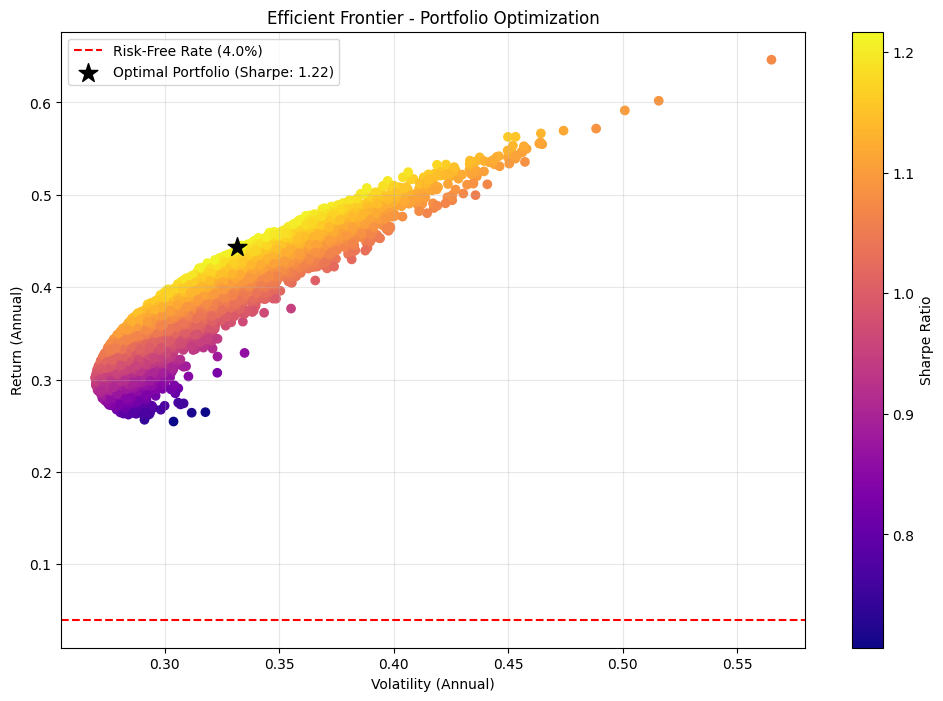

In [162]:
plt.figure(figsize=(12,8))
plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Annual)')
plt.ylabel('Return (Annual)')
plt.title('Efficient Frontier - Portfolio Optimization')

# Risk-free rate line
plt.axhline(y=risk_free_rate, color='r', linestyle='--', label=f'Risk-Free Rate ({risk_free_rate:.1%})')

# Optimal Portfolio
plt.scatter(max_sharpe_volatility, max_sharpe_return, 
           c='black', s=200, marker='*', edgecolors='black', 
           label=f'Optimal Portfolio (Sharpe: {sharpe_array.max():.2f})')

plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [163]:
# Print the optimal weights for each stock
print(tickers)
print(weights_array[index_max_sharpe,:])

['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
[0.49327    0.21695192 0.00785999 0.00422443 0.27769365]


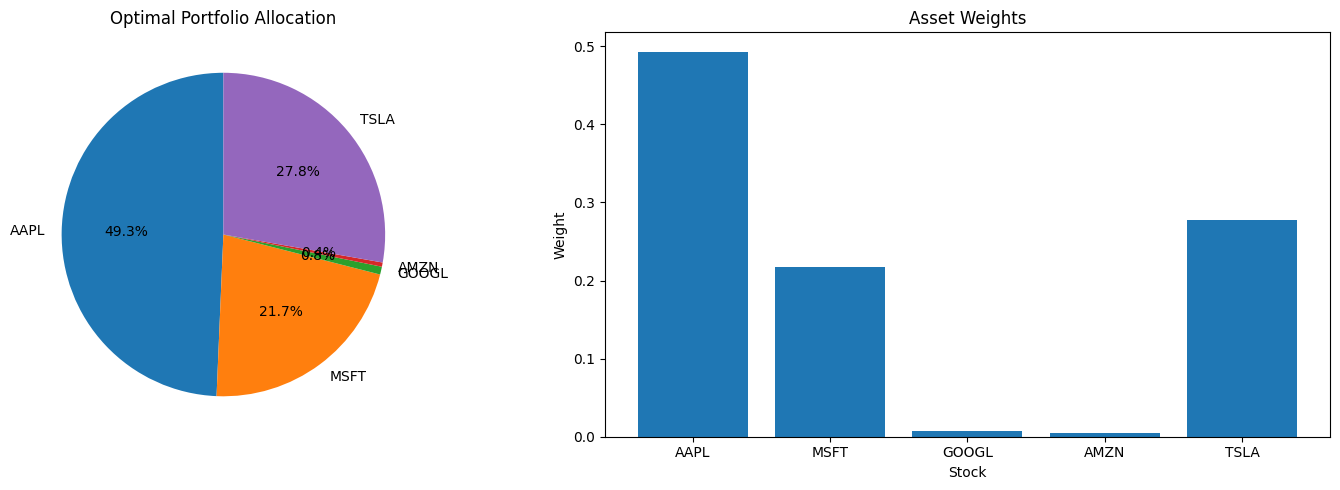

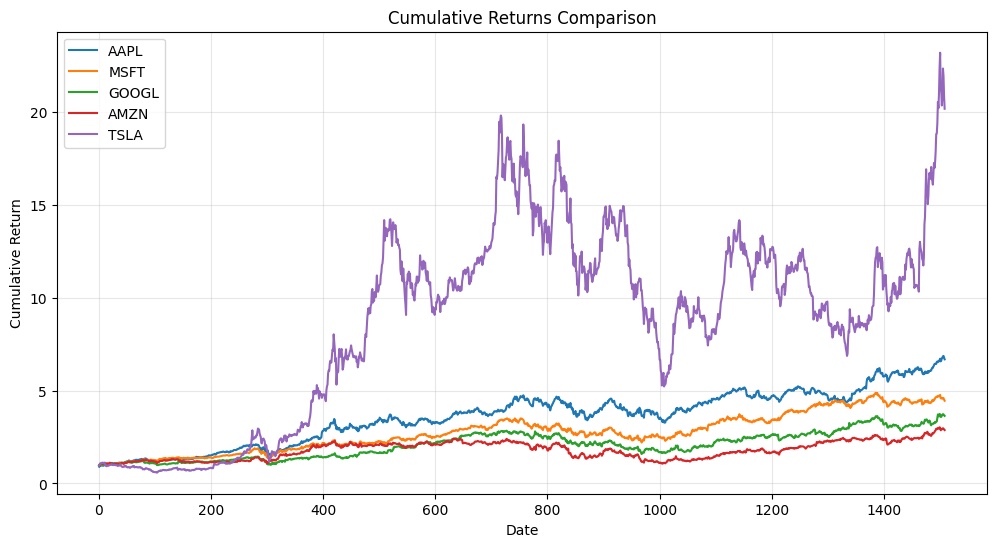

In [164]:
# A) Composition of the optimal portfolio

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart
optimal_weights = weights_array[index_max_sharpe]
ax1.pie(optimal_weights, labels=tickers, autopct='%1.1f%%', startangle=90)
ax1.set_title('Optimal Portfolio Allocation')

# Bar chart
ax2.bar(tickers, optimal_weights)
ax2.set_title('Asset Weights')
ax2.set_ylabel('Weight')
ax2.set_xlabel('Stock')

plt.tight_layout()
plt.show()

#B) Historical cumulative returns
cumulative_returns = (1 + stock_returns).cumprod()
plt.figure(figsize=(12, 6))
for col in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[col], label=col)
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(alpha=0.3)
plt.show()